Implementation of Regression Models

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Normal Equation Results:
  True weights: [ 3. -2.]
  Estimated weights: [ 3.0411274  -2.03461987]
  True bias: 1.5
  Estimated bias: 1.5247

Gradient Descent Results:
  Estimated weights: [ 3.03792567 -2.03428022]
  Estimated bias: 1.5233

Ridge Regression Results:
  Estimated weights: [ 2.67162665 -1.84369835]
  Estimated bias: 1.4647


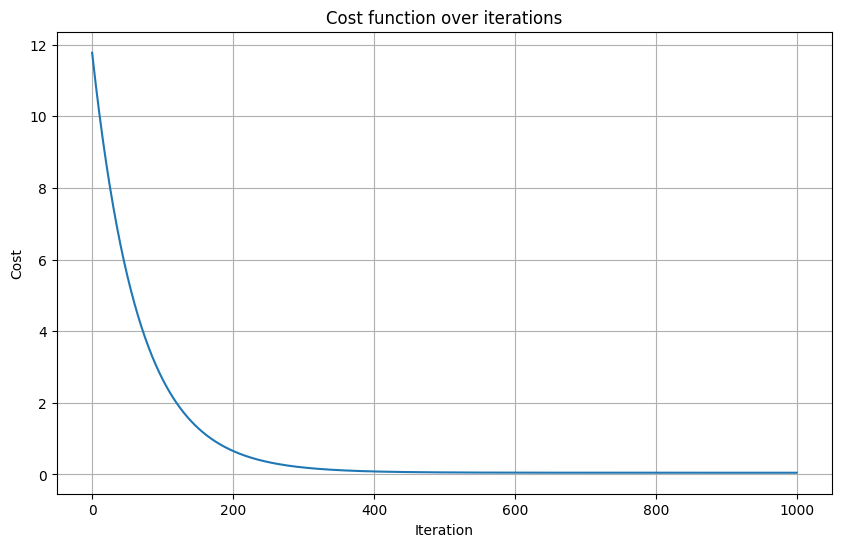

In [2]:
class LinearRegression:
    def __init__(self, method: str = 'normal', learning_rate: float = 0.01, max_itr: int = 1000, regularization: str = None, alpha: float = 0.01):
        self.method = method
        self.learning_rate = learning_rate
        self.max_itr = max_itr
        self.regularization = regularization
        self.alpha = alpha
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def fit(self, X, y):
        n_samples, n_features = X.shape

        if self.method == 'normal':
            self._fit_normal_equation(X, y)
        elif self.method == 'gradient_descent':
            self._fit_gradient_descent(X, y)
        else:
            raise ValueError("Method must be 'normal' or 'gradient_descent'")
        
        return self
    
    def _fit_normal_equation(self, X, y):
        X_wbias = np.c_[np.ones((X.shape[0], 1)), X]

        if self.regularization == 'ridge':
            I = np.eye(X_wbias.shape[1])
            I[0, 0] = 0
            params = np.linalg.inv(X_wbias.T @ X_wbias + self.alpha * I) @ X_wbias.T @ y
        else:
            params = np.linalg.inv(X_wbias.T @ X_wbias) @ X_wbias.T @ y

        self.bias = params[0]
        self.weights = params[1:]
        
    def _fit_gradient_descent(self, X, y):            
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.max_itr):
            y_pred = self.predict(X)

            cost = self._compute_cost(y, y_pred)
            self.cost_history.append(cost)

            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            if self.regularization == 'ridge':
                dw += self.alpha * self.weights
            elif self.regularization == 'lasso':
                dw += self.alpha * np.sign(self.weights)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def _compute_cost(self, y_true, y_pred):
        mse = np.mean((y_true - y_pred) ** 2)

        if self.regularization == 'ridge':
            mse += self.alpha * np.sum(self.weights ** 2)
        elif self.regularization == 'lasso':
            mse += self.alpha * np.sum(np.abs(self.weights))

        return mse
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def plot_cost_history(self):
        if self.cost_history:
            plt.figure(figsize=(10, 6))
            plt.plot(self.cost_history)
            plt.title("Cost function over iterations")
            plt.xlabel('Iteration')
            plt.ylabel('Cost')
            plt.grid(True)
            plt.show()

def gen_regression_data(n_samples: int = 100, noise: float = 0.1):
    np.random.seed(42)
    X = np.random.randn(n_samples, 2)
    true_weights = np.array([3.0, -2.0])
    true_bias = 1.5
    y = X @true_weights + true_bias + noise * np.random.randn(n_samples)
    return X, y, true_weights, true_bias

X , y, true_weights, true_bias = gen_regression_data(100, 0.2)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_normal = LinearRegression(method='normal')
lr_normal.fit(X_train, y_train)
print("Normal Equation Results:")
print(f"  True weights: {true_weights}")
print(f"  Estimated weights: {lr_normal.weights}")
print(f"  True bias: {true_bias}")
print(f"  Estimated bias: {lr_normal.bias:.4f}")

lr_gd = LinearRegression(method='gradient_descent', learning_rate=0.01, max_itr=1000)
lr_gd.fit(X_train, y_train)
print("\nGradient Descent Results:")
print(f"  Estimated weights: {lr_gd.weights}")
print(f"  Estimated bias: {lr_gd.bias:.4f}")

lr_ridge = LinearRegression(method='gradient_descent', regularization='ridge', alpha=0.1)
lr_ridge.fit(X_train, y_train)
print("\nRidge Regression Results:")
print(f"  Estimated weights: {lr_ridge.weights}")
print(f"  Estimated bias: {lr_ridge.bias:.4f}")

lr_gd.plot_cost_history()

Supervised Learning using Dataset

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import load_breast_cancer

In [6]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [7]:
y_pred = model.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix: 
[[ 62   1]
 [  2 106]]


In [8]:
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [9]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy Score: 98.25%


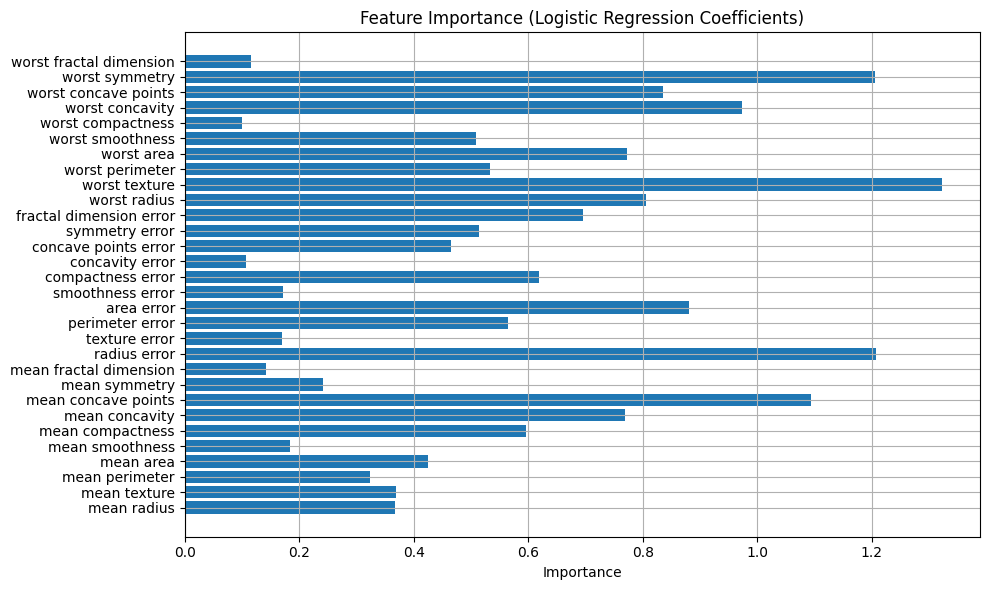

In [10]:
feature_importance = np.abs(model.coef_[0])
features = data.feature_names

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel("Importance")
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.tight_layout()
plt.grid(True)
plt.show()